## TNFV - Thresholding Numerical Feature Variance
```
FileName: TNFV-v3.ipynb
Creation Date: 23-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedTSVD.gzip
Runtime: 2 mins
Description: Reduce Features.  From TNFV we derive top Feature list; Data is not transformed here
Version:
    v1: 14-Jul-2018: Initial Version
    v3: 23-Jul-2018: Copy of v1, testing out flattening...
```

In [2]:
# Setup parameters
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3" # Train
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test
n_feats = 50

In [3]:
# Load libraries 
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import datetime

In [4]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-23 11:03:28


In [5]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [6]:
x_data = df.drop('label',axis=1)
x_data.shape

(206665, 577)

In [7]:
y_data = df["label"].values
y_data.shape

(206665,)

In [17]:
songs_matrix = x_data.as_matrix(columns=None)

In [18]:
songs_matrix.shape

(206665, 577)

In [29]:
import math
math.floor(206665/577)*577

206566

In [24]:
358*577

206566

In [34]:
songs_matrix2 = songs_matrix[:(math.floor(206665/577)*577), :]

In [35]:
songs_matrix2.shape

(206566, 577)

In [40]:
newShape = songs_matrix2.reshape(math.floor(206566/577), 577)

ValueError: cannot reshape array of size 119188582 into shape (358,577)

In [13]:
single_song = x_data.as_matrix(columns=None)[:577, :]

In [14]:
single_song.shape

(577, 577)

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

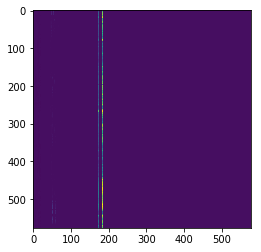

In [16]:
plt.imshow(single_song)

In [8]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


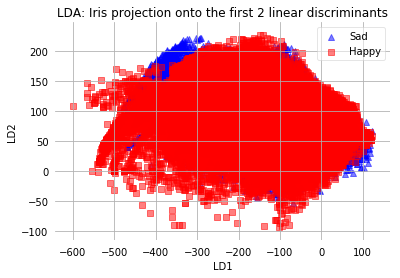

In [9]:
plot_step_lda(x_data.as_matrix(columns=None), y_data)

In [101]:
# Create thresholder
thresholder = VarianceThreshold(threshold=0.5)

In [102]:
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(x_data)

In [103]:
features_high_variance.shape

(206665, 127)

In [104]:
# View variances 
variancesDF = pd.DataFrame(thresholder.fit(x_data).variances_, columns=["Column1"], index=x_data.columns)

In [105]:
variancesDF.shape

(577, 1)

In [106]:
variancesSort = ((variancesDF.abs()).unstack()).sort_values(kind="quicksort", ascending=False)

In [107]:
variancesSort

Column1  f183    3.726597e+06
         f173    7.549496e+05
         f45     3.611483e+05
         f174    3.347014e+05
         f46     2.061564e+05
         f47     3.512143e+04
         f44     2.470514e+04
         f52     2.098796e+04
         f48     1.305792e+04
         f66     1.240777e+04
         f54     1.222830e+04
         f53     1.033799e+04
         f51     9.698164e+03
         f0      9.085983e+03
         f70     8.974392e+03
         f69     8.930586e+03
         f61     8.912079e+03
         f67     8.141309e+03
         f68     8.058891e+03
         f60     8.015149e+03
         f50     7.847169e+03
         f55     7.654931e+03
         f63     7.375995e+03
         f49     7.015554e+03
         f56     6.300362e+03
         f62     5.904504e+03
         f58     5.888513e+03
         f65     5.188483e+03
         f64     4.918480e+03
         f59     4.123212e+03
                     ...     
         f548    3.987441e-11
         f549    2.691948e-11
         f

In [108]:
topFeat = []
for item, frame in variancesSort.iteritems():
    if item[0] != item[1]:
        if item[0] not in topFeat:
            if len(topFeat) >= n_feats:
                break
            else:
                if item[0] != "Column1":
                    topFeat.append(item[0])
        if item[1] not in topFeat:
            if len(topFeat) >= n_feats:
                break
            else:
                topFeat.append(item[1])

In [109]:
n_top_feats = len(topFeat)
n_top_feats

50

In [110]:
topFeat.append("label")

### Write CSV with reduced PCA features

In [111]:
newHeadList = topFeat

In [112]:
newDF = df.copy()

In [113]:
oldHeadList = newDF.columns
oldHeadList

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576',
       'label'],
      dtype='object', length=578)

In [114]:
dropColList = [x for x in oldHeadList if x not in newHeadList]

In [115]:
newDF = newDF.drop(labels=dropColList, axis=1)

In [116]:
newDF.columns

Index(['f0', 'f1', 'f2', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80',
       'f81', 'f82', 'f83', 'f86', 'f88', 'f90', 'f92', 'f173', 'f174', 'f183',
       'label'],
      dtype='object')

In [117]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedTNFV" + str(n_top_feats) + ".gzip"), sep=",", index=False, 
             header=newHeadList, compression='gzip')

In [118]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-14 09:08:23
